In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# assign automapped tables to respective variables
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

session.query(measurement)
session.query(station)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"Most Recent Date: {latest_date}")

Most Recent Date: ('2017-08-23',)


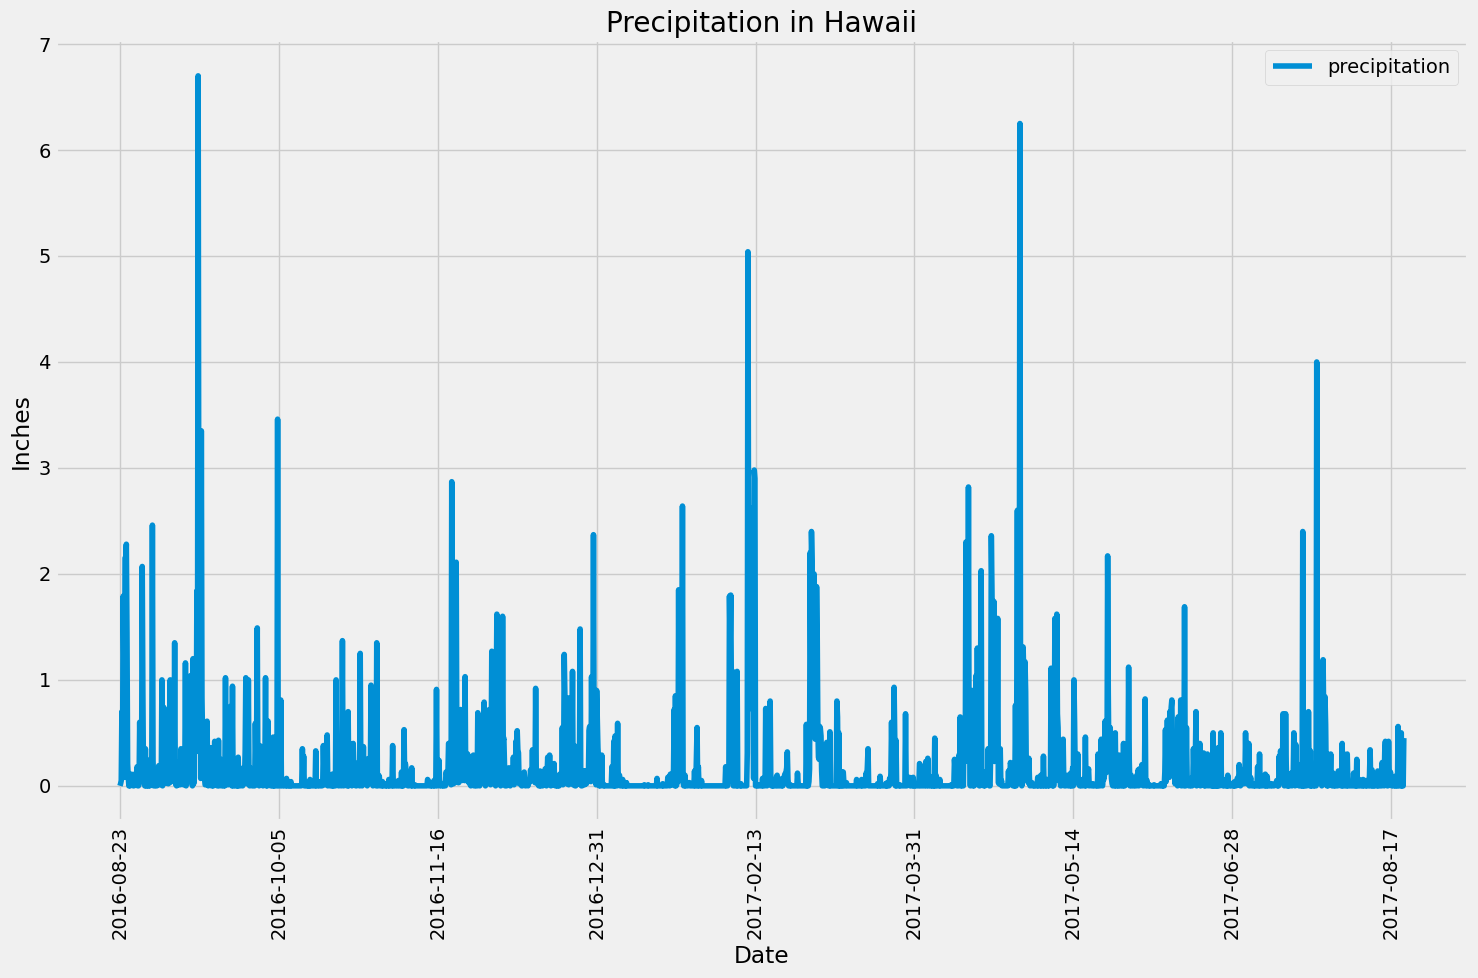

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# '2017-08-23'

# Calculate the date one year from the last date in data set.
last_date = dt.date(2017,8,23)
year_before = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_before, measurement.date <= last_date).\
    filter(measurement.prcp.isnot(None)).all()
#prcp_data

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns=['date','precipitation'])
prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(15,10))
plt.xticks(rotation=90)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.legend(loc='upper right')
plt.title('Precipitation in Hawaii')
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_count = session.query(measurement.station, func.count(measurement.station)).\
                  group_by(measurement.station).\
                  order_by(func.count(measurement.station).desc()).all()

stations_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281')
for temp in min_temp:
    print(temp)
    
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281')
for temp in max_temp:
    print(temp)
    
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281')
for temp in avg_temp:
    print(temp)

(54.0,)
(85.0,)
(71.66378066378067,)


Text(0.5, 1.0, 'Temperatures Observed')

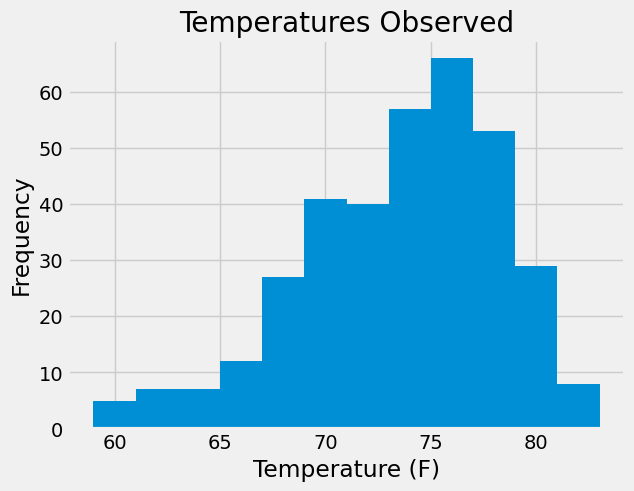

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= year_before, measurement.date <= last_date)

temp_data = pd.DataFrame(temp_data)

temp_histogram = temp_data.hist(bins=12)
plt.xlabel('Temperature (F)') 
plt.ylabel('Frequency')
plt.title('Temperatures Observed')

# Close session

In [16]:
# Close Session
session.close()